![Computational Modelling for Predict Repeat General Anaesthesia in Paediatric Dentistry Patients](Images\Main.jpg)

<p style="font-size:30px;text-align:center;color:rgba(78,6,176,255)">Computational Modelling for Predict Repeat General Anaesthesia </p>
<p style="font-size:30px;text-align:center;color:rgba(78,6,176,255)">in Paediatric Dentistry Patients </p>

<p style="font-size:15px;text-align:center;color:rgba(78,6,176,255)">Winter 2024</p>

<h1>1-Objective:</h1>

The objective of this research project is to develop a predictive model using machine learning techniques to identify factors associated with repeat general anaesthesia (GA) in paediatric dentistry patients. The model will provide valuable insights into the risk factors and contribute to optimizing treatment planning and patient management strategies in dental practices.

⬇Libraries

In [2]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix

📌 My Functions & Classes

Notebook Color Scheme:


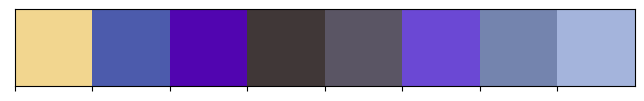

In [3]:
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'
my_colors = ["#f2d68f", "#4c5bac", "#5105b0", "#403737", "#5a5564" ,"#6b48d4","#7484ae","#a4b4dc"]
sns.palplot(sns.color_palette(my_colors))
print(clr.S+"Notebook Color Scheme:"+clr.E)
plt.show()

<h1>1-The Data & EDA</h1>

📝 we have a dataset, for patient who had one GA or more. Let's have look at it.

In [17]:
#Read Data in DataFrame
df=pd.read_csv('Data\Main_Dataset.csv')

In [18]:
df.head()

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)",Using Nursing Bottle?,Maxillary Central Insicor,Brushing Own Teeth,Poor Coperation?,Lack of Follow-up?,First-GA Before Eruption of Second Molar,"REPEAT GA(Yes=1, No=0)"
0,1,1.0,8.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,False
1,2,0.0,6.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,3,0.0,7.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,False
3,4,0.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,5,0.0,7.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,False


In [19]:
print(clr.S+"The dataset has a size of:"+clr.E, df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df.isna().sum()

The dataset has a size of: (369, 16) 

Missing values:


ID                                                                           0
medical History (Yes=1, No=0)                                                0
age                                                                          0
regular attender (Yes=1, No=0)                                               0
Socioeconomic status(Low=1, Moderate=2, High=3)                              0
Ease of Access (Yes=1, No=0)                                                 0
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        0
Justification for GA(Yes=1, No=0)                                            0
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    0
Using Nursing Bottle?                                                        0
Maxillary Central Insicor                                                    0
Brushing Own Teeth                                                           0
Poor Coperation?                                    

<div class="alert simple-alert">
  <p>💡<b>Note</b>: Great News!!!It seems that don't have missing values 🎉</p
</div>

<h2>1-1 Analysis of each column independently </h2>

👌 let's see each field and take a note about each one

<h3>1-1-1 ID</h3>

![ID](Images\ID.jpg)

📌Unique identifier for each patient

In [20]:
print(clr.S+" The ID field has  has :"+clr.E, df.iloc[:,0].nunique(), clr.S+"unique values "+clr.E+"\n")


 The ID field has  has : 307 unique values 



📝 As we know that we have 369 distinct records, it seems that during appending datasets we had experienced some kind of overlapping in ID.<br> Let's fix this.

In [21]:
df.drop("ID",axis=1,inplace=True)

df["ID"]=np.arange(1,370)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df.loc[:, cols]
df.set_index('ID',inplace=True)
print(clr.S+"The ID field has "+clr.E, df.index.nunique(), clr.S+"unique values "+clr.E+"\n")

The ID field has  369 unique values 



<h3>1-1-2 Medical History: </h3>

![Medical History](Images/MedicalHistory.jpg)

Binary variable indicating whether the patient has a medical history (Yes=1, No=0)

In [65]:
#some changes in type
df[df.columns[0]]=df.iloc[:,0].astype("int")

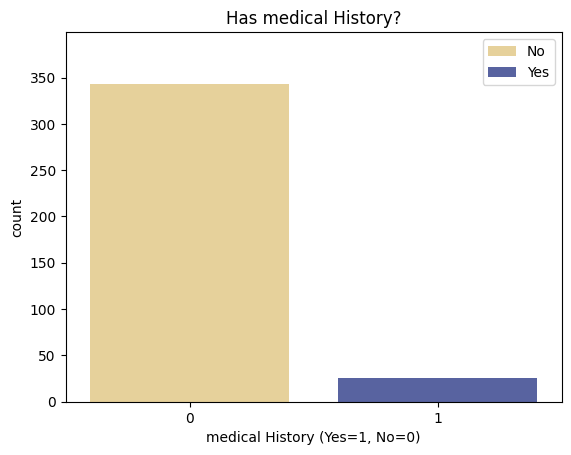

In [78]:
sns.countplot(df,x=df.columns[0],hue=df.columns[0], dodge=False, palette = sns.color_palette(my_colors))

plt.title("Has medical History?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<h3>1-1-3 Age: </h3>

![Age](Images/Age.jpg)

Age of the patient

In [67]:
#some changes in type
df[df.columns[1]]=df.iloc[:,1].astype("int")

<Figure size 1200x400 with 0 Axes>

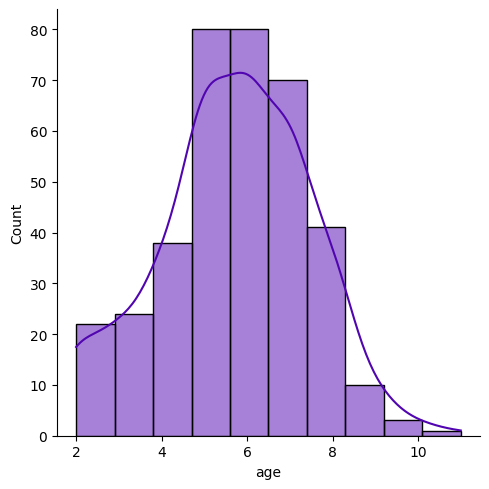

In [69]:

plt.figure(figsize = (12,4))
sns.displot(data= df.iloc[:,1], bins = 10,  kde=True, color = my_colors[2])
plt.show()

📝 It has almost normal shape. No scaling is needed.

<h3>1-1-4 Regular Attender: </h3>

Binary variable indicating whether the patient is a regular attender (Yes=1, No=0)

In [70]:
#some changes in type
df[df.columns[2]]=df.iloc[:,2].astype("int")


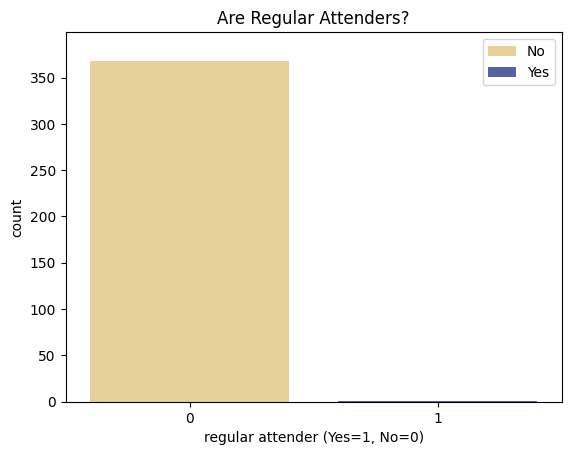

In [81]:
sns.countplot(df,x=df.columns[2],hue=df.columns[2], dodge=False,palette = sns.color_palette(my_colors))

plt.title("Are Regular Attenders?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

📝 Because all records have same value so there is no information gain on this. This will be removed at next step.

<h3>1-1-5 Socioeconomic Status: </h3>

Categorical variable indicating socioeconomic status (Low=1, Moderate=2, High=3)

In [82]:
#some changes in type
df[df.columns[3]]=df.iloc[:,3].astype("int")

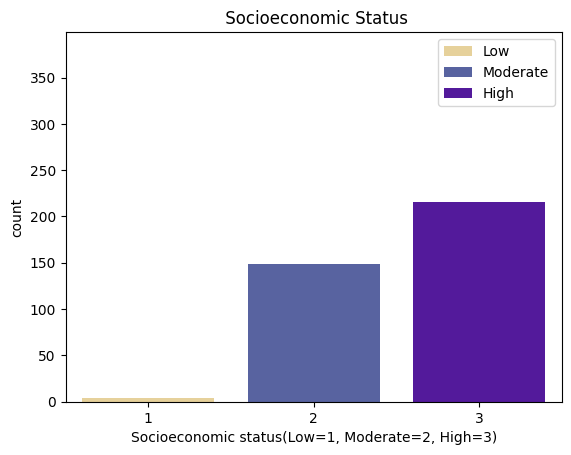

In [84]:
sns.countplot(df,x=df.columns[3],hue=df.columns[3], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Socioeconomic Status")
plt.legend(["Low","Moderate","High"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")



📝 Wealthy people spend more on their children dental issues. It makes sense. we will use one hot encoding on next step on this.

 <h3>1-1-6 Ease of Access:  </h3>

![Dental Care](Images/Dentalcare.jpg)

Binary variable indicating ease of access to dental care (Yes=1, No=0)

In [85]:
#some changes in type
df[df.columns[4]]=df.iloc[:,4].astype("int")

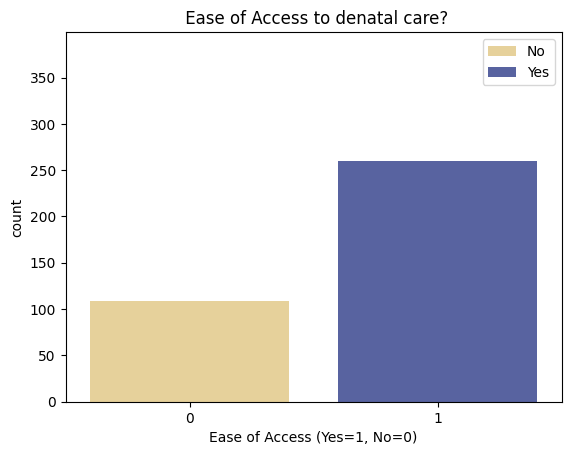

In [87]:
sns.countplot(df,x=df.columns[4],hue=df.columns[4], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Ease of Access to denatal care?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")





📝 Most of people who did GA, had good dental care.

 <h3>1-1-7 Pre-treatment Radiographs: </h3>

![Xray](Images/XRay.jpg)

 Binary variable indicating whether pre-treatment radiographs are available (Yes=1, No=0)

In [88]:
#some changes in type
df[df.columns[5]]=df.iloc[:,5].astype("int")

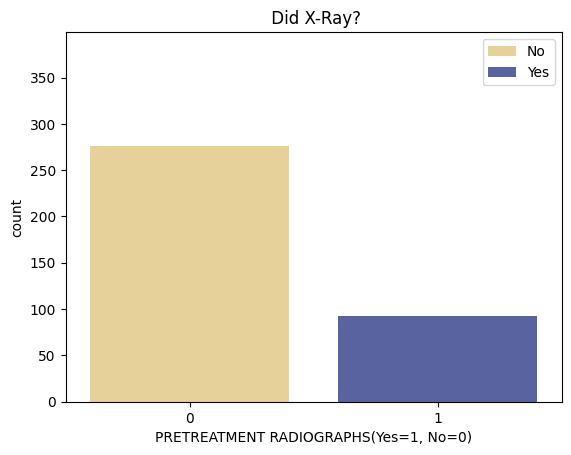

In [89]:
sns.countplot(df,x=df.columns[5],hue=df.columns[5], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Did X-Ray?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Most of time there is no need for X-Ray before GA.

 <h3>1-1-8 Justification for GA:  </h3>

Binary variable indicating whether there is a justification for GA (Yes=1, No=0)

In [24]:
#some changes in type
df[df.columns[6]]=df.iloc[:,6].astype("int")

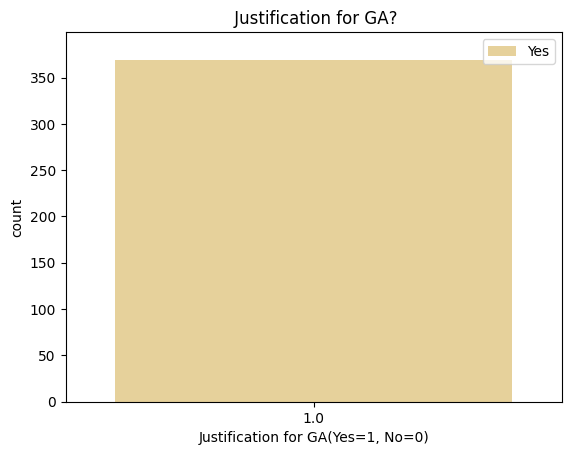

In [94]:
sns.countplot(df,x=df.columns[6],hue=df.columns[6], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Justification for GA?")
plt.legend(["Yes","No"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")





📝 Because all records have same value so there is no information gain on this. This will be removed at next step.

 <h3>1-1-9 Type of GA:   </h3>

Categorical variable indicating the type of GA procedure (RESTORATIVE=0, Composite=1, Crowns=2, Extraction only=3)

In [96]:
#some changes in type
df[df.columns[7]]=df.iloc[:,7].astype("int")

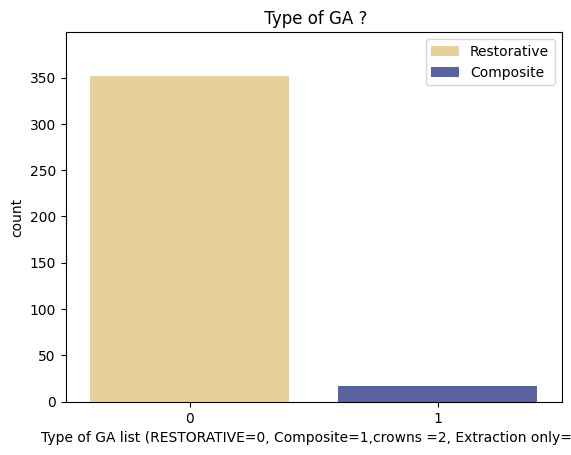

In [98]:
sns.countplot(df,x=df.columns[7],hue=df.columns[7], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Type of GA ?")
plt.legend(["Restorative","Composite"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 From the chart, we can see clearly most of the time GA is for Restorative. we will use one hot encoding on next step on this.

 <h3>1-1-10 Using Nursing Bottle?    </h3>

![Nursery Bottle](Images/Nursery%20Bottle.jpg)

 Binary variable indicating whether the patient using the Nursery bottle when had first GA (Yes=1, No=0)

In [101]:
#some changes in type
df[df.columns[8]]=df.iloc[:,8].astype("int")

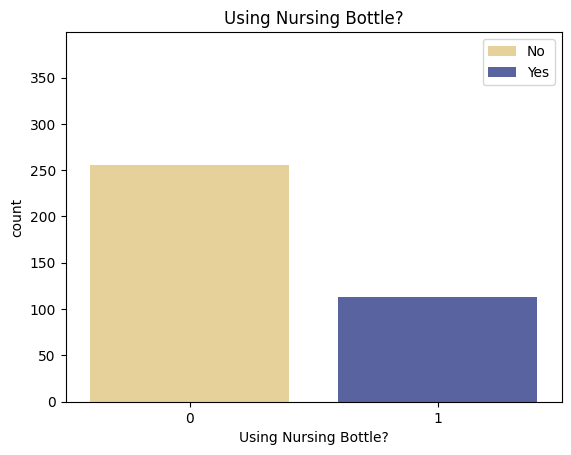

In [104]:
sns.countplot(df,x=df.columns[8],hue=df.columns[8], dodge=False,palette = sns.color_palette(my_colors))

plt.title("Using Nursing Bottle?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Comment

 <h3>1-1-11 Maxillary Central Incisor   </h3>

![Maxillary central incisor](Images/Maxillary_central_incisor.jpg)

 Binary variable indicating whether the patient had Maxillary Central Incisor (Yes=1, No=0)

In [105]:
#some changes in type
df[df.columns[9]]=df.iloc[:,9].astype("int")

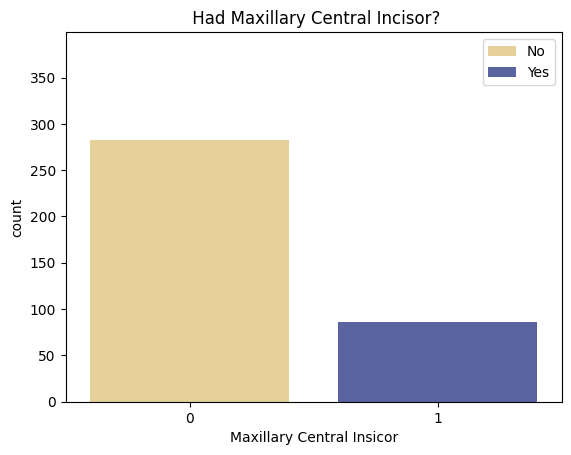

In [106]:
sns.countplot(df,x=df.columns[9],hue=df.columns[9], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Had Maxillary Central Incisor?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Comment

 <h3>1-1-12 Brushing Own Teeth    </h3>

![toddler tooth brushing](Images/toddler-tooth-brushing.jpg)

 Binary variable indicating whether the patients brush their tooth by themselves (Yes=1, No=0)

In [107]:
#some changes in type
df[df.columns[10]]=df.iloc[:,10].astype("int")

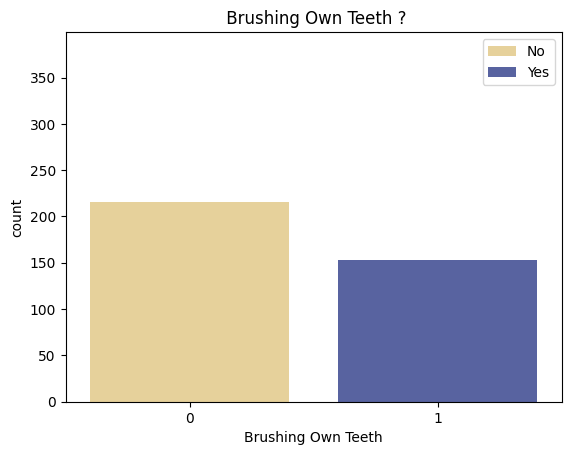

In [109]:
sns.countplot(df,x=df.columns[10],hue=df.columns[10], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Brushing Own Teeth ?")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Comment

 <h3>1-1-13 Poor Cooperation?   </h3>

![Poor Cooperation](Images/poor.jpg)

 Binary variable indicating whether the patients have poor cooperation during the dental care ? (Yes=1, No=0)

In [111]:
#some changes in type
df[df.columns[11]]=df.iloc[:,11].astype("int")

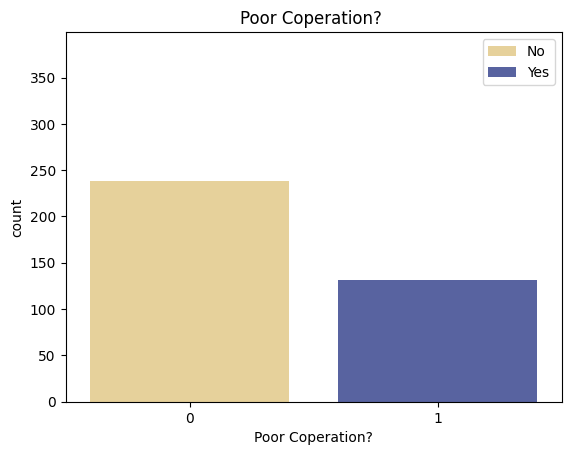

In [113]:
sns.countplot(df,x=df.columns[11],hue=df.columns[11], dodge=False,palette = sns.color_palette(my_colors))

plt.title("Poor Coperation? ")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Comment

 <h3>1-1-14 Lack of Follow-up?  </h3>

![Lack of Follow-up?](Images/followup.jpg)

 Binary variable indicating whether the parents care about their children dental follow up ? (Yes=1, No=0)

In [114]:
#some changes in type
df[df.columns[12]]=df.iloc[:,12].astype("int")

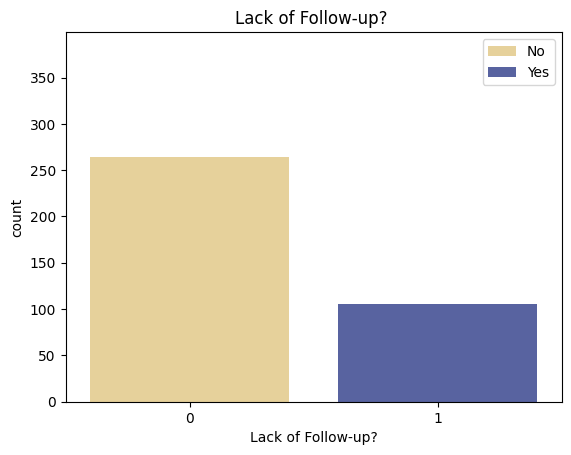

In [116]:
sns.countplot(df,x=df.columns[12],hue=df.columns[12], dodge=False,palette = sns.color_palette(my_colors))

plt.title("Lack of Follow-up? ")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Comment

 <h3>1-1-15 First-GA Before Eruption of Second Molar?  </h3>

![Lack of Follow-up?](Images/eruption.jpg)

 Binary variable indicating whether First GA happened before eruption of second molar or not  ? (Yes=1, No=0)

In [117]:
#some changes in type
df[df.columns[13]]=df.iloc[:,13].astype("int")

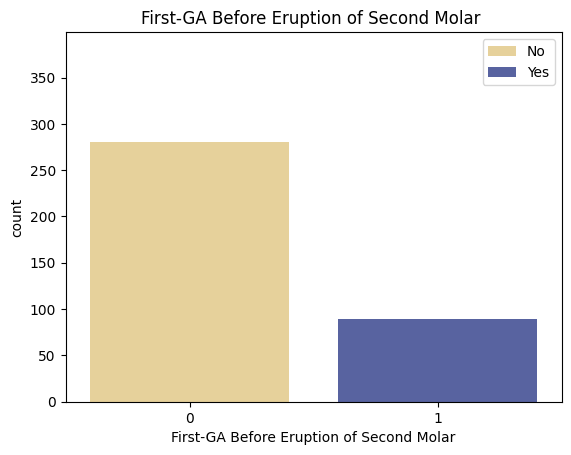

In [118]:
sns.countplot(df,x=df.columns[13],hue=df.columns[13], dodge=False,palette = sns.color_palette(my_colors))

plt.title("First-GA Before Eruption of Second Molar ")
plt.legend(["No","Yes"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




📝 Comment

 <h3>1-1-16 Repeat GA:(Target Variable)   </h3>

 Binary variable indicating whether the patient requires repeat GA (Yes=1, No=0)   

In [119]:
#some changes in type
df[df.columns[14]]=df.iloc[:,14].astype("int")

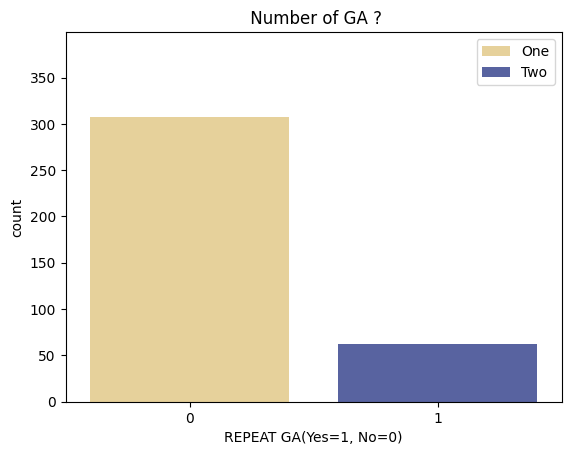

In [120]:
sns.countplot(df,x=df.columns[14],hue=df.columns[14], dodge=False,palette = sns.color_palette(my_colors))

plt.title(" Number of GA ?")
plt.legend(["One","Two"])
plt.ylim(0,len(df)+30)

plt.show()



# just for centering the plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")




# fig,ax=plt.subplots()
# temp_df=combined_df.iloc[:,9].value_counts()
# bars=temp_df.plot(kind="bar",color=my_colors[5])
# ax.set_title(" Number of GA ?")
# ax.set_xticklabels(["Once GA","Twice GA","Trice GA"],rotation=45)
# ax.set_ylim(0,max(temp_df)+80)

# plt.show()

📝 We convert target variable to 0 for once GA and 1 for more than once GA.